In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_json('transaction-data-adhoc-analysis.json')
df['transaction_date']=pd.to_datetime(df['transaction_date'],format='%Y-%m-%d') # convert to date-time format
df.sort_values(by='transaction_date',ascending=True) #sort the date
print(df.head())


                                    address   birthdate  \
0                 USNS Wagner\nFPO AE 00917  1926/03/11   
1                USCGC Benson\nFPO AP 48794  2016/07/08   
2                USCGC Benson\nFPO AP 48794  2016/07/08   
3                USCGC Benson\nFPO AP 48794  2016/07/08   
4  33911 Hansen Loaf\nWest Sandra, ND 54188  1949/09/27   

                     mail               name sex       username  \
0  watsonbrenda@gmail.com  Jennifer Campbell   F  veronicawells   
1     moorelisa@gmail.com        Melissa Kim   F       cgilbert   
2     moorelisa@gmail.com        Melissa Kim   F       cgilbert   
3     moorelisa@gmail.com        Melissa Kim   F       cgilbert   
4     michael78@yahoo.com     Kristen Cooper   F     qhernandez   

                                   transaction_items  transaction_value  \
0                  Exotic Extras,Beef Chicharon,(x4)               5196   
1  Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...              12056   
2  HealthyKid 3+,

In [2]:
set(df.head()['address'])

{'33911 Hansen Loaf\nWest Sandra, ND 54188',
 'USCGC Benson\nFPO AP 48794',
 'USNS Wagner\nFPO AE 00917'}

In [3]:
#get state with the most customers
statelist=[]
for a in set(df['address'].unique()):
    address_string=a.split(' ')
    state=address_string[-2]
    statelist.append(state)

def most_frequent(statelist):
    return max((statelist), key = statelist.count)
#print(most_frequent(statelist))
print('The most common state in the listed address per customer is', most_frequent(statelist))

The most common state in the listed address per customer is AA


In [15]:
results_dict={}

price_df = df[~df["transaction_items"].str.contains(';')][['transaction_items', 'transaction_value']]

def calculate_value(item_string, total_value, result_dict): 
    split_item = item_string.split(',') 
    item_name = ','.join(split_item[0:2]) 
    item_value = int(total_value) / int(split_item[2][2:-1])
    result_dict[item_name] = item_value 
    return

item_prices = {} 

price_df.apply(lambda x: calculate_value(item_string = x['transaction_items'], total_value = x['transaction_value'], result_dict = item_prices), axis=1)
print(item_prices)


{'Exotic Extras,Beef Chicharon': 1299.0, 'HealthyKid 3+,Yummy Vegetables': 500.0, 'Exotic Extras,Kimchi and Seaweed': 799.0, 'Candy City,Gummy Worms': 150.0, 'HealthyKid 3+,Gummy Vitamins': 1500.0, 'HealthyKid 3+,Nutrional Milk': 1990.0, 'Candy City,Orange Beans': 199.0}


In [5]:
def split_transaction(row, results):
    transaction_items = row['transaction_items'].split(';') 
    
    for item in transaction_items:
        split_item = item.split(',', 2) 
        name = ','.join(split_item[:2])  
        quantity = int(split_item[2][2:-1])  
        total_price = item_prices[name] * quantity
        results['item_name'].append(name)
        results['item_quantity'].append(quantity) 
        results['transaction_price'].append(total_price)
        results['date'].append(row['transaction_date'].to_period('M')) 
    

results = { 'item_name': [], 'item_quantity': [], 'transaction_price': [], 'date': [] }

df.apply(lambda row: split_transaction(row, results), axis=1) 
transaction_df = pd.DataFrame(results)

In [16]:
transaction_table = pd.pivot_table(transaction_df, values='transaction_price', columns=['date'], index=['item_name'], aggfunc=np.sum)
transaction_table['Sum of Revenue per Item']=transaction_table.sum(axis=1)
transaction_table

date,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,Sum of Revenue per Item
item_name,,,,,,,
"Candy City,Gummy Worms",1433850.0,1499400.0,1497900.0,1506450.0,1470150.0,1490100.0,8897850.0
"Candy City,Orange Beans",1945026.0,1997363.0,1912589.0,1972886.0,1982836.0,2011094.0,11821794.0
"Exotic Extras,Beef Chicharon",12554835.0,12991299.0,12750984.0,12847110.0,13026372.0,12862698.0,77033298.0
"Exotic Extras,Kimchi and Seaweed",7731124.0,7949251.0,7963633.0,7926879.0,7808627.0,8073096.0,47452610.0
"HealthyKid 3+,Gummy Vitamins",14521500.0,14970000.0,15217500.0,14763000.0,14922000.0,14970000.0,89364000.0
"HealthyKid 3+,Nutrional Milk",19356730.0,19285090.0,19653240.0,19474140.0,19663190.0,19436330.0,116868720.0
"HealthyKid 3+,Yummy Vegetables",4979500.0,5128000.0,4948000.0,4930500.0,4867500.0,4861000.0,29714500.0


In [8]:
quantity_table = pd.pivot_table(transaction_df, values='item_quantity', columns=['date'], index=['item_name'], aggfunc=np.sum)
quantity_table['Total Sales']=quantity_table.sum(axis=1)
quantity_table

date,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,Total Sales
item_name,,,,,,,
"Candy City,Gummy Worms",9559,9996,9986,10043,9801,9934,59319
"Candy City,Orange Beans",9774,10037,9611,9914,9964,10106,59406
"Exotic Extras,Beef Chicharon",9665,10001,9816,9890,10028,9902,59302
"Exotic Extras,Kimchi and Seaweed",9676,9949,9967,9921,9773,10104,59390
"HealthyKid 3+,Gummy Vitamins",9681,9980,10145,9842,9948,9980,59576
"HealthyKid 3+,Nutrional Milk",9727,9691,9876,9786,9881,9767,58728
"HealthyKid 3+,Yummy Vegetables",9959,10256,9896,9861,9735,9722,59429


In [9]:

months_covered = list(df['transaction_date'].dt.to_period('M').unique())

monthly_customers = {}
for month in months_covered:
    month_transactions = df[df['transaction_date'].dt.to_period('M') == month]
    
    monthly_customers[str(month)] = set(month_transactions['name'].unique())
    
months_covered = list(map(lambda x: str(x), months_covered)) 
months_covered

['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06']

In [10]:

                   
# line chart to show changes in number of customers     
import matplotlib.pyplot as plt
%matplotlib inline
x=[]
y=[]

for i in months_covered:
    x.append(i)
    y.append(len(monthly_customers[i]))
print(x)
print(y)
  

['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06']
[6588, 6631, 6622, 6556, 6568, 6652]


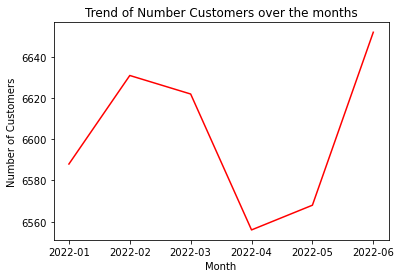

In [11]:
plt.plot(x,y,'r')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Trend of Number Customers over the months')
plt.show()

In [12]:

#creating a dictionary with keys and empty values to be appended to later
result={'name': [],'month': [], 'type': [], 'count': []}

for person_name in set(df['name'].unique()): 
    has_bought_something = person_name in monthly_customers[months_covered[0]] 
    has_always_bought_something = person_name in monthly_customers[months_covered[0]]
    
    for i in range(1,len(months_covered)): 
        previous_month = months_covered[i-1]
        current_month = months_covered[i]
        
        #sets of users with a transaction for a certain month
        previous_month_set = monthly_customers[previous_month]
        current_month_set = monthly_customers[current_month]
        
        bought_last_month = person_name in previous_month_set
        bought_this_month = person_name in current_month_set
            
        if not has_bought_something and bought_this_month: #has_bought_something check
            has_bought_something = True #first time buyer

        if has_always_bought_something and not bought_this_month: #has always bought something check
            has_always_bought_something = False #stopped buying
        
        result['name'].append(person_name)
        result['month'].append(current_month)
        result['count'].append(1)
        if bought_last_month and bought_this_month: 
            if has_always_bought_something and bought_this_month:
                result['type'].append('Engaged')
            else:
                result['type'].append('Repeater')
        elif bought_last_month and not bought_this_month:
            result['type'].append('Inactive')
        else:
            result['type'].append('Others')

type_df = pd.DataFrame(result)

type_table = pd.pivot_table(type_df, values='count', columns=['month'], index=['type'], aggfunc=np.sum)
type_table


month,2022-02,2022-03,2022-04,2022-05,2022-06
type,,,,,
Engaged,5172.0,4126.0,3289.0,2667.0,2190.0
Inactive,1416.0,1415.0,1468.0,1446.0,1375.0
Others,1899.0,1856.0,1865.0,1931.0,1919.0
Repeater,NaN,1090.0,1865.0,2443.0,3003.0


['2022-02', '2022-03', '2022-04', '2022-05', '2022-06']


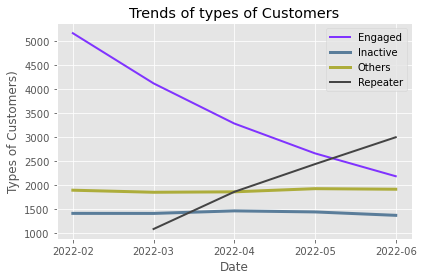

In [13]:

#create line chart to show changes in number of customers     
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
x=[]
for i in months_covered:
    x.append(i)
    
x.pop(0)
print(x)
o=type_table.iloc[2]
r=type_table.iloc[3]
e=type_table.iloc[0]
i=type_table.iloc[1]

plt.plot(x,e,color='#8033FF', linewidth=2,label='Engaged')
plt.plot(x,i,color='#5a7d9a',linewidth=3,label='Inactive')
plt.plot(x,o,color='#adad3b', linewidth=3,label='Others')
plt.plot(x,r,color='#444444', linewidth=2,label='Repeater')

plt.xlabel('Date')
plt.ylabel('Types of Customers)')
plt.title('Trends of types of Customers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('plot.png')
plt.show()
